# Entree Task: Implementing Your Own Neural Networks from Scratch

In [1]:
import math
import numpy as np

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [2]:
class LinearLayer:
    def __init__(self, _m, _n, dropout = 0.2):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight
        for _ in range(int(self.W.size*0.2)):
            self.W[np.random.randint(0, self.W.shape[0])][np.random.randint(0, self.W.shape[1])] = 0
        self.b_grad = None #record the gradient of the biases
        self.b = (np.random.uniform(low=-10000.0, high=10000.0, size = (1, _n)))/10000.0*np.sqrt(6.0/ _m)

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        # (1) Store the input X in stored_data for Backward.
        self.stored_X = X
        # (2) :return: X * weights
        return (X @ self.W) + self.b
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        # 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
        self.W_grad = self.stored_X.T @ Y_grad
        # Calculate the gradient of the output (the result of the Forward method) w.r.t. the **b** and store the product of the gradient and Y_grad in b_grad
        self.b_grad = np.sum(Y_grad, axis = 0, keepdims = True)
        # 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
        return Y_grad @ self.W.T
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [3]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backward. Please check your implementation again.')

Your gradient:  [[-1.23489461  0.33983695  0.65058254]]
Numerical gradient: [[-1.23489461  0.33983695  0.65058254]]
Error:  1.2374545832471995e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [4]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        out = [[max(0, x) for x in features] for features in X]
        return np.array(out)
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        grad_relu = np.array([[0 if x <= 0 else 1 for x in features] for features in self.stored_X])
        return grad_relu * Y_grad
        ##########  Code end   ##########
        
        
class Sigmoid:
    def __init__(self):
        self.stored_X = None
    
    def forward(self, X, store=True):
        # we use this store variable because backward utilizes the forward
        if store:
            self.stored_X = X
        out = np.array([[1./(1. + np.exp(-x)) for x in features] for features in X])
        return out
    
    def backward(self, Y_grad):
        grad_sigmoid = self.forward(self.stored_X, store=False) * (1-self.forward(self.stored_X, store=False))
        return grad_sigmoid * Y_grad
    
class Softmax:
    def __init__(self):
        self.stored_X = None
        
    def forward(self, X):
        self.stored_X = X
        out = []
        # calculate the softmax activation for each feature in each batch
        for feature in X:
            exp = np.exp(feature - np.max(feature))
            out.append(exp/np.sum(exp))
        return np.array(out)
    

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [5]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.57867021 0.58376157 0.88814995]]
Numerical gradient: [[0.57867021 0.58376157 0.88814995]]
Error:  5.896583221698393e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [6]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
        
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all 
         the elements in the stored_data divided by the number of elements, 
         i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total 
         number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        self.stored_diff = prediction - groundtruth
        mse = sum(self.stored_diff)**2/len(self.stored_diff)
        return mse        
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as 
         * grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        grad = (2 * self.stored_diff) / len(self.stored_diff)
        return grad
        ##########  Code end   ##########
        
        

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [7]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
        inp_layers = []
        # iterate through each layer in the architecture
        for i, layer in enumerate(layers_arch):
            layer_obj = None
            if layer[0] == "Linear" :
                # make sure that...
                #     two layers out exists (skip the activation layer)
                #     and that the input dimensions of the next linear layer matches the output of dim of this layer
                if i+2 < len(layers_arch) and layers_arch[i+2][1][0] != layer[1][1]:
                    raise Exception("Network architecture makes no sense")
                # new linear layer with optional dropout parameter
                layer_obj = LinearLayer(layer[1][0], layer[1][1], dropout= 0 if len(layer) < 3 else layer[2])
            elif layer[0] == "ReLU":
                layer_obj = ReLU()
            elif layer[0] == "Sigmoid":
                layer_obj = Sigmoid()
            inp_layers.append(layer_obj)
            
        self.layers = inp_layers
        ##########  Code end   ##########
        
    def recursively_propagate(self, layer, inp):
        # if at the last layer
        if layer == len(self.layers) - 1:
            # return the output of that last layer
            return self.layers[layer].forward(inp)
        # else recursively propagate to the next layer with the output of this layer
        # hence the name
        return self.recursively_propagate(layer+1, self.layers[layer].forward(inp))
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        ########## Code start  ##########
        return self.recursively_propagate(0, X)
        ##########  Code end   ##########

    def recursively_back_prop(self, layer, inp):
        # save the result gradient from this layer 
        res_grad = self.layers[layer].backward(inp)
        if layer == 0:
            # if at the first layer, just return the result gradient
            return res_grad
        # recursively propagate backwards with the result gradient
        # the chain rule happens within each .backward function of each layer
        return self.recursively_back_prop(layer-1, res_grad)
    
    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        return self.recursively_back_prop(len(self.layers)-1, Y_grad)
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [8]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction =  self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
                    self.net.layers[i].b -= self.net.layers[i].b_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)

In [9]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  [48.24432442]  | Test loss :  [173.8111502]
Epoch:  2 / 200  | Train loss:  [17.43382817]  | Test loss :  [63.52897653]
Epoch:  3 / 200  | Train loss:  [6.31428869]  | Test loss :  [23.60798827]
Epoch:  4 / 200  | Train loss:  [2.34123716]  | Test loss :  [9.22936446]
Epoch:  5 / 200  | Train loss:  [0.92067106]  | Test loss :  [3.88573425]
Epoch:  6 / 200  | Train loss:  [0.39664562]  | Test loss :  [1.79809771]
Epoch:  7 / 200  | Train loss:  [0.19400882]  | Test loss :  [0.93684063]
Epoch:  8 / 200  | Train loss:  [0.11170158]  | Test loss :  [0.55806711]
Epoch:  9 / 200  | Train loss:  [0.07598799]  | Test loss :  [0.37867003]
Epoch:  10 / 200  | Train loss:  [0.05927605]  | Test loss :  [0.28762079]
Epoch:  11 / 200  | Train loss:  [0.05080487]  | Test loss :  [0.23814022]
Epoch:  12 / 200  | Train loss:  [0.0461654]  | Test loss :  [0.20979439]
Epoch:  13 / 200  | Train loss:  [0.04344149]  | Test loss :  [0.19254559]
Epoch:  14 / 200  | Train loss

Epoch:  113 / 200  | Train loss:  [0.02190487]  | Test loss :  [0.02348581]
Epoch:  114 / 200  | Train loss:  [0.02187338]  | Test loss :  [0.02313692]
Epoch:  115 / 200  | Train loss:  [0.02184266]  | Test loss :  [0.02279536]
Epoch:  116 / 200  | Train loss:  [0.02181268]  | Test loss :  [0.02246085]
Epoch:  117 / 200  | Train loss:  [0.02178341]  | Test loss :  [0.02213318]
Epoch:  118 / 200  | Train loss:  [0.02175482]  | Test loss :  [0.02181215]
Epoch:  119 / 200  | Train loss:  [0.0217269]  | Test loss :  [0.02149761]
Epoch:  120 / 200  | Train loss:  [0.02169963]  | Test loss :  [0.0211894]
Epoch:  121 / 200  | Train loss:  [0.02167298]  | Test loss :  [0.02088738]
Epoch:  122 / 200  | Train loss:  [0.02164694]  | Test loss :  [0.02059139]
Epoch:  123 / 200  | Train loss:  [0.02162149]  | Test loss :  [0.02030132]
Epoch:  124 / 200  | Train loss:  [0.02159661]  | Test loss :  [0.02001702]
Epoch:  125 / 200  | Train loss:  [0.02157228]  | Test loss :  [0.01973838]
Epoch:  126 / 

array([0.00866891])

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [10]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    encoded = np.zeros((len(labels),classes))
    for i, v in enumerate(labels): 
        encoded[i][v] = 1
    return encoded
    ##########  Code end   ##########


In [13]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path

        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        
        softmax = Softmax()
        
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            # wrap the output of the last layer in softmax to get discrete probabilities
            pred = softmax.forward(self.net.forward(batch_data))
            # add the loss
            loss += self.loss_function.forward(pred, batch_one_hot_label)          

            # calculate the gradient
            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            # go through each layer of the network
            for i in range(len(self.layers_arch)):
                # if layer type includes trainable params
                if self.layers_arch[i][0] == 'Linear':
                     # adjust the weights and biases based on the gradient and learning_rate
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
                    self.net.layers[i].b -= self.net.layers[i].b_grad * self.learning_rate
            ##########  Code end   ##########
        
        return loss / n_loop
    
    def Test(self, record=False):
        '''
        the class with max score is our predicted label
        
        added recording option to plot the loss and training accuracies
        '''
        correct = []
        incorrect = []
        
        softmax = Softmax()
        score = softmax.forward(self.net.forward(self.test_data))
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                correct.append(self.test_data[i])
                accuracy = accuracy +1
            else:
                incorrect.append(self.test_data[i])

        accuracy = accuracy/np.shape(score)[0]
        if record:
            return (accuracy, correct, incorrect, score, self.test_labels)
        else:
            return accuracy

    def Train(self, record=False):
        self.dataloader()
        accuracies = []
        losses = []
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuracy= self.Test()
            if record:
                accuracies.append(accuracy)
                losses.append(loss)
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuracy)
        return accuracies, losses

## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

In [15]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28,128), 0.2], 
                          ['ReLU'], 
                          ['Linear', (128, 64), 0.2],
                          ['ReLU'],
                          ['Linear', (64,10)]]

cls = Classifier(train_data_path, 
                 train_labels_path, 
                 test_data_path, 
                 test_labels_path, 
                 layers_arch = classifier_layers_arch, 
                 learning_rate = 0.01, batch_size =64, max_epoch = 50)

accuracies, losses = cls.Train(record=True)
accuracy, correct, incorrect, score, test_labels = cls.Test(record=True)


Epoch:  1 / 50  | Train loss:  [0.09468985 0.14240784 0.12268485 0.10337062 0.15424638 0.12448736
 0.05167267 0.18818962 0.13326382 0.07933169]  | Test Accuracy :  0.265
Epoch:  2 / 50  | Train loss:  [0.0757157  0.15608271 0.05433978 0.09316759 0.11189498 0.09317252
 0.03851617 0.16074652 0.10406745 0.07048982]  | Test Accuracy :  0.41
Epoch:  3 / 50  | Train loss:  [0.07517932 0.14743684 0.05086752 0.07793804 0.10503157 0.08649553
 0.0322565  0.15137175 0.10537587 0.06527159]  | Test Accuracy :  0.525
Epoch:  4 / 50  | Train loss:  [0.0722042  0.11916512 0.04810518 0.06725715 0.09910711 0.08295728
 0.02661115 0.13172467 0.10159604 0.06313191]  | Test Accuracy :  0.595
Epoch:  5 / 50  | Train loss:  [0.05503525 0.08528186 0.04000418 0.05996854 0.09075533 0.07900577
 0.02178767 0.10305022 0.0913378  0.05992066]  | Test Accuracy :  0.62
Epoch:  6 / 50  | Train loss:  [0.03413875 0.06127918 0.0324235  0.05533813 0.0791746  0.07018835
 0.01830983 0.07836721 0.08139364 0.05562817]  | Test 

Epoch:  50 / 50  | Train loss:  [0.00115611 0.00193458 0.00166064 0.00690375 0.00762338 0.01183836
 0.00298447 0.01102078 0.01029787 0.00892114]  | Test Accuracy :  0.86


1


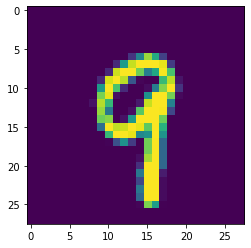

In [16]:
# VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline

def vis_acc():
    plt.xlabel("Test Accuracy")
    plt.ylabel("Epochs")
    plt.plot(accuracies)
    
def vis_loss():
    global losses
    plt.xlabel("Training Loss")
    plt.ylabel("Epochs")
    losses = np.array(losses)
    for i in range(losses.shape[1]):
        plt.plot(losses[:,i])

        
def vis_confusion_matrix():
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    onehot_score = []
    for sc in score:
        onehot_score.append(np.argmax(sc))
    cf_matrix = confusion_matrix(onehot_score, test_labels)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    plt.show()
    
def vis_examples(num):
    print(np.argmax(score[num]))
    plt.imshow(correct[num].reshape((28,28)))
    
        
vis_examples(4)